Classification problem to predict a loan would be approved or not.

In [2]:
######## Import Modules

# ignore warning 
import warnings
warnings.filterwarnings("ignore")

# data manipulation and analysis
# implement statistical modeling and machine learning models
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline
from sklearn import svm

In [3]:
# Data Collection and Processing

# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('Loan_Dataset.csv')

# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [796]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [797]:
loan_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Data preprocessing
- Null values
- Replace null values
    - mean for symmetric distribution
    - median/mode for skewed distribution

In [801]:
# Replace null values with mean
# Numerical values
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean())
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(
    loan_dataset['Loan_Amount_Term'].mean())
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(
    loan_dataset['Credit_History'].mean())


In [4]:
# Replace null values with mode
# Categorical values
# mode()[0] for values, instead of dataframe
loan_dataset['Gender'] = loan_dataset['Gender'].fillna(
    loan_dataset['Gender'].mode()[0])
loan_dataset['Married'] = loan_dataset['Married'].fillna(
    loan_dataset['Married'].mode()[0])
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].fillna(
    loan_dataset['Self_Employed'].mode()[0])
loan_dataset['Dependents'] = loan_dataset['Dependents'].fillna(
    loan_dataset['Dependents'].mode()[0])


In [800]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [803]:
# Exploratory Data Analysis (EDA)

# Creation of new attributes

# Total income
loan_dataset['Combined_Income'] = loan_dataset['ApplicantIncome'] + loan_dataset['CoapplicantIncome']
loan_dataset['Combined_Income'] = np.log(loan_dataset['Combined_Income'])
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515


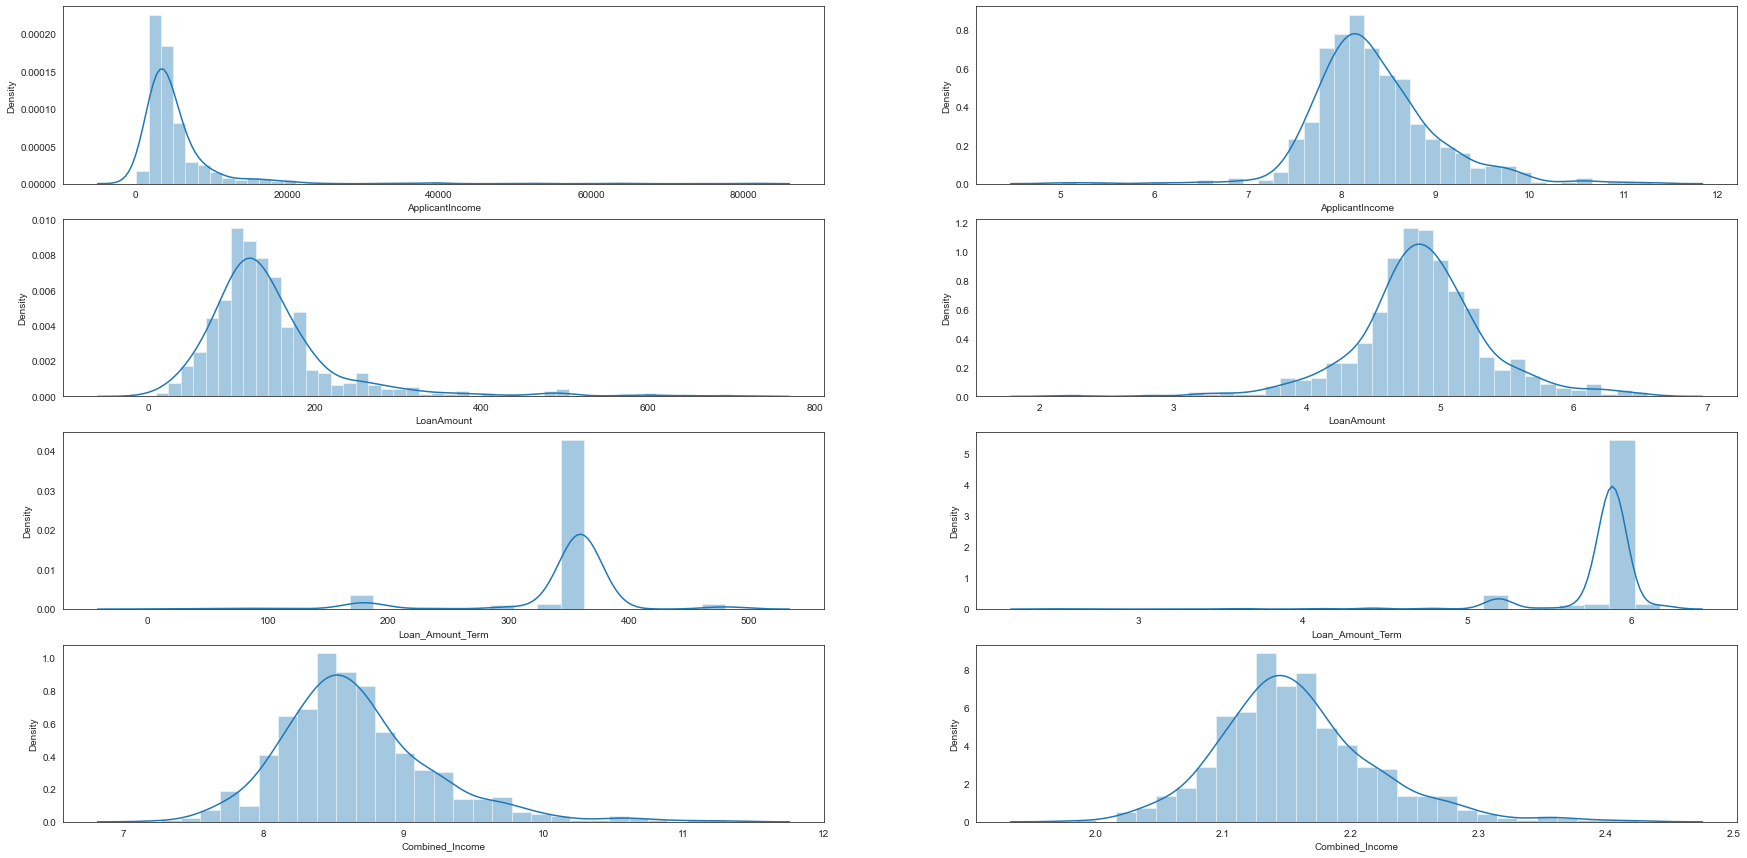

In [805]:
# Numerical visualisation
# Log transform/minmax for left/right skewed distribution to normalize data
fig, ax = plt.subplots(4,2, figsize=(30,15))
sns.distplot(loan_dataset['ApplicantIncome'], ax=ax[0,0])
sns.distplot(np.log(loan_dataset['ApplicantIncome']), ax=ax[0,1])
sns.distplot(loan_dataset['LoanAmount'], ax=ax[1,0])
sns.distplot(np.log(loan_dataset['LoanAmount']), ax=ax[1,1])
sns.distplot(loan_dataset['Loan_Amount_Term'], ax=ax[2,0])
sns.distplot(np.log(loan_dataset['Loan_Amount_Term']), ax=ax[2,1])
sns.distplot(loan_dataset['Combined_Income'], ax=ax[3, 0])
sns.distplot(np.log(loan_dataset['Combined_Income']), ax=ax[3,1])

loan_dataset['ApplicantIncome'] = np.log(loan_dataset['ApplicantIncome'])
loan_dataset['LoanAmount'] = np.log(loan_dataset['LoanAmount'])
loan_dataset['Loan_Amount_Term'] = np.log(loan_dataset['Loan_Amount_Term'])


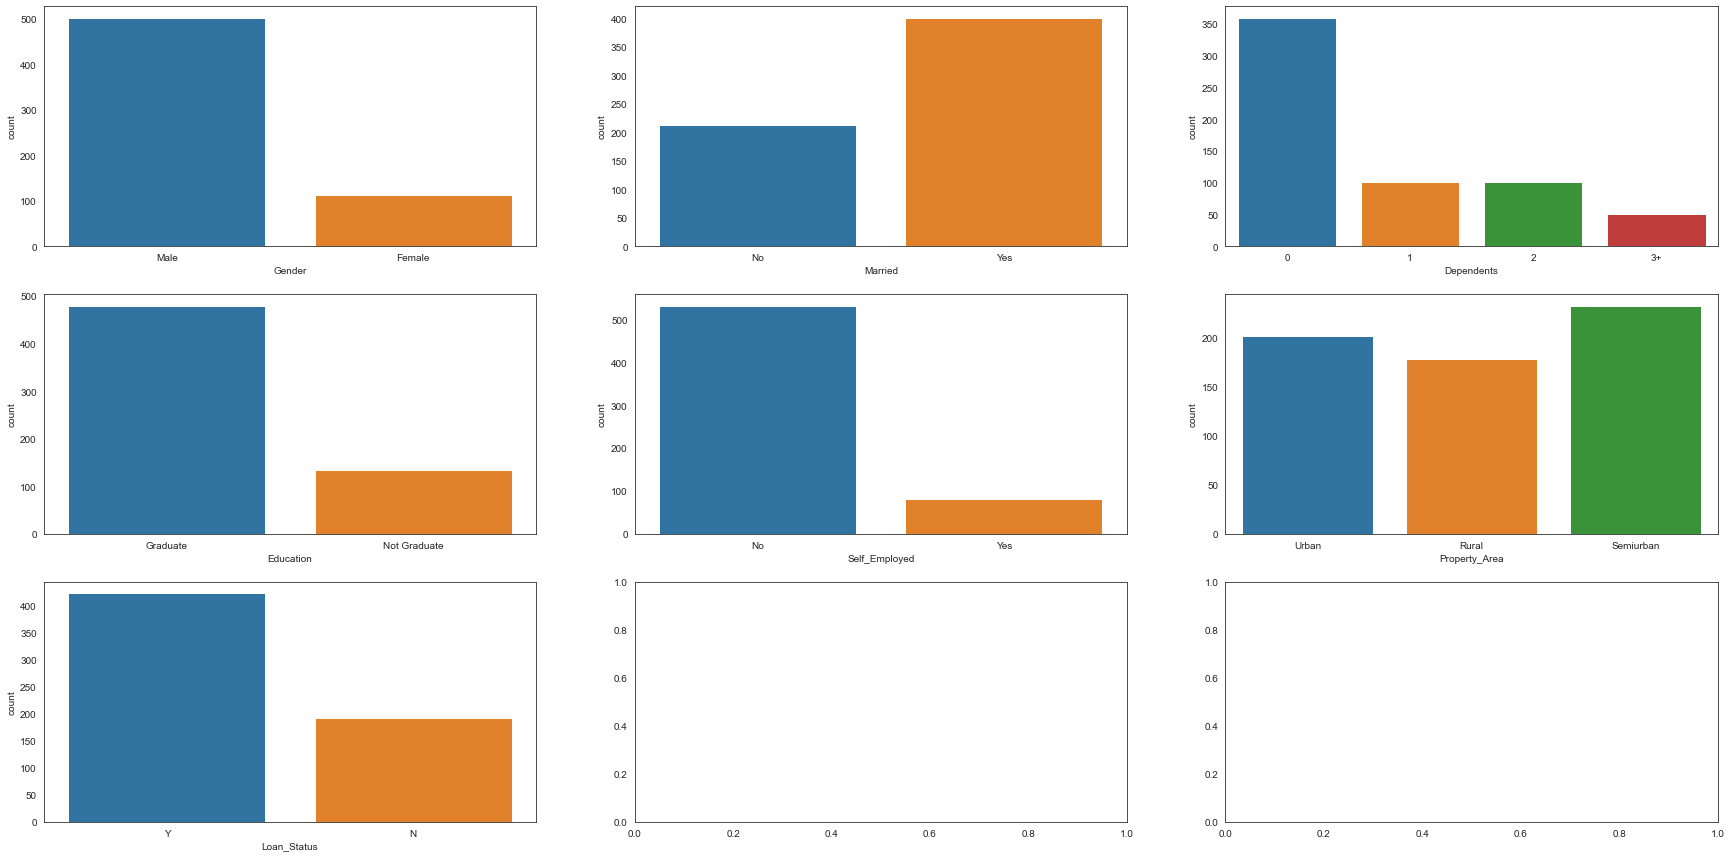

In [806]:
# Categorical visualisation
fig, ax = plt.subplots(3, 3, figsize=(30, 15))
sns.countplot(loan_dataset['Gender'], ax=ax[0,0])
sns.countplot(loan_dataset['Married'], ax=ax[0,1])
sns.countplot(loan_dataset['Dependents'], ax=ax[0,2])
sns.countplot(loan_dataset['Education'], ax=ax[1,0])
sns.countplot(loan_dataset['Self_Employed'], ax=ax[1,1])
sns.countplot(loan_dataset['Property_Area'], ax=ax[1,2])
sns.countplot(loan_dataset['Loan_Status'], ax=ax[2,0])
fig.show()

In [807]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,N,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,Y,8.505323
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,Y,8.699515


<Axes: ylabel='count'>

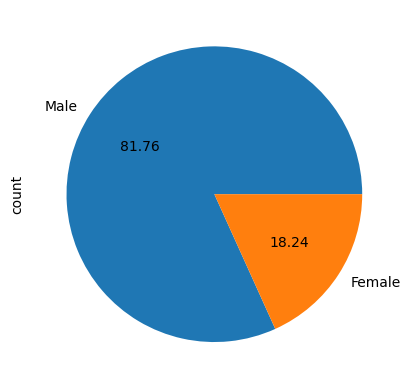

In [5]:
###### Numerical visualisation
# pie chart
loan_dataset['Gender'].value_counts().plot(kind="pie", autopct="%.2f")

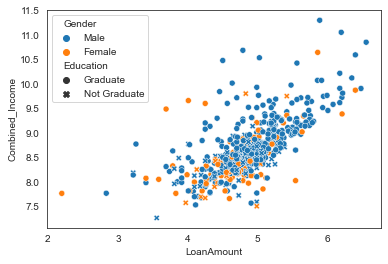

In [811]:
# Categorical visualisation
sns.scatterplot(x="LoanAmount", y="Combined_Income", hue="Gender", style='Education', data=loan_dataset)
plt.show()


In [814]:
# drop unnecessary columns
cols = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Combined_Income']
loan_dataset = loan_dataset.drop(columns=cols, axis=1)

loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [815]:
# Label Encoding

# convert the categorical column into the numerical column.

from sklearn.preprocessing import LabelEncoder
cols = ['Gender', "Married", "Dependents", "Education", 'Self_Employed', "Property_Area", "Loan_Status"]
le = LabelEncoder()
for col in cols:
    loan_dataset[col] = le.fit_transform(loan_dataset[col])
    
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.0,2,1
1,1,1,1,0,0,1.0,0,0
2,1,1,0,0,1,1.0,2,1
3,1,1,0,1,0,1.0,2,1
4,1,0,0,0,0,1.0,2,1


In [817]:
# Train Test Split

# I/O Attributes
X = loan_dataset.drop(columns=['Loan_Status'], axis=1)
y = loan_dataset['Loan_Status']

In [818]:
# input features for training, evaluating model performance
# target variable for training, testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [819]:
# Model Training

# classify function
from sklearn.model_selection import cross_val_score
def classify_fn(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    a = model.score(x_test, y_test)*100
    print("Accuracy : " + "%.2f" % round(a, 2) + "%")
    # cross validation - 75/25
    # eg: cv-5 (5 plots), train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    b = np.mean(score)*100
    print("Cross validation :" + "%.2f" % round(b,2) + "%")

In [820]:
# Logistic Regression:

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
classify_fn(model_lr, X, y)


Accuracy : 77.27%
Cross validation :80.95%


In [822]:
# Decision Tree:

from sklearn.tree import DecisionTreeClassifier
model_dct = DecisionTreeClassifier()
classify_fn(model_dct, X, y)


Accuracy : 73.38%
Cross validation :73.79%


In [823]:
# Extra Trees:

from sklearn.ensemble import ExtraTreesClassifier
model_etc = ExtraTreesClassifier()
classify_fn(model_etc, X, y)


Accuracy : 71.43%
Cross validation :74.43%


In [824]:
print("Logistic Regression")
classify_fn(model_lr, X, y)
print("Decision Tree")
classify_fn(model_dct, X, y)
print("Extra Tree")
classify_fn(model_etc, X, y)


Logistic Regression
Accuracy : 77.27%
Cross validation :80.95%
Decision Tree
Accuracy : 72.73%
Cross validation :73.95%
Extra Tree
Accuracy : 72.08%
Cross validation :75.41%
